# SNLP Assignment 1

Name 1: Shahla Jahangiri  
Student id 1: 7062700  
Email 1: shja00003@stud.uni-saarland.de  


Name 2: Parnian Jahangirirad  
Student id 2: 7062810  
Email 2: paja00003@stud.uni-saarland.de  

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook. There is no need to submit the data files. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

## Exercise 1 (7 = 2+2+0.25+0.25+0.5+1+1 points)

You are given the subfolder `data`, which contains 4 files:
- `alice_eng.txt` contains the text of Alice's Adventures in Wonderland by Lewis Carroll (source: https://www.gutenberg.org/ebooks/19033).
- `alice_ger.txt` contains the translation of Alice's Adventures in Wonderland into German (source: https://www.gutenberg.org/ebooks/19778).
- `trainer.py` contains the Python code of Transformer's trainer module by Huggingface (source: https://github.com/huggingface/transformers/blob/v4.40.1/src/transformers/trainer.py#L277).
- `uniprot_sprot.fasta` contains sequences of amino acids, forming proteins (source: https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/complete/uniprot_sprot.fasta.gz). If you are interested, you can look up the meaning of the letters inside the file here: https://en.wikipedia.org/wiki/Protein_sequence

---

We provide you with some code that loads the data and tokenizes the text (such that you receive a list of words). Your task is to implement the functions `analysis_linear` and `analysis_loglog`, as well as answer the questions.


### 1. Linear Plot for `alice_eng.txt` (2 points)
- (1.1) Count how many times each word occurs (raw frequencies) in `alice_eng.txt`, then rank the words, such that highest frequency has rank 1 and so on. For each of the words, plot the frequency against the rank. Use a plot with linear axes. (2 points)

In [1]:
# your code goes here!
# TODO:
!pip3 install matplotlib
import matplotlib.pyplot as plt
from collections import Counter

def analysis_linear(name, data):
    word_freq = Counter(data)
    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1],reverse=True)

    ranks = range(1,len(sorted_freq)+1)
    freqs = [pair[1] for pair in sorted_freq]

    # Plot the frequencies against ranks
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, freqs, marker='o', linestyle='-')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Word Frequencies vs Ranks')
    plt.grid(True)
    plt.show()

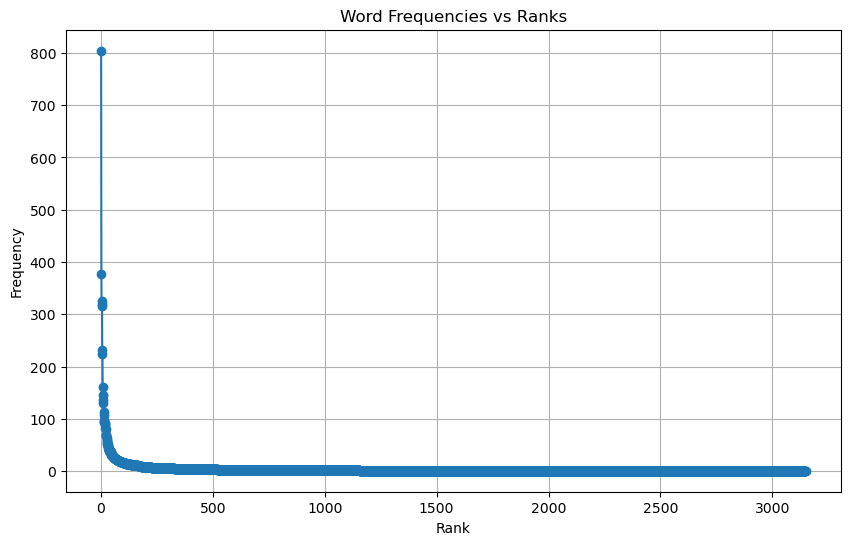

In [2]:
# run on English text, linear axes
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_linear("English", f.read().lower().split())


### 2. Log-log Plots (3 points)
- (2.1) Now do this for all of the 4 files, but use the log-log scale for your plots. (2 = (5 * 0.5) points)
- (2.2) Why is it better to use a log-log scale? (0.25 points)
- (2.3) In your plot, what causes the vertical gaps ("steps") for high-rank words (rightmost)? (0.25 points)
- (2.4) What are the differences between the languages? What causes them? (0.5 points)

### 3. Zipf's Law (2 points)
- (3.1) Zipf's law "predicts" the frequency of the n-th rank word. Add an 'ideal' line to your 4 plots, according to Zipf's law. Use the following formula. (1 point)

$$\hat{y}_i = \frac{\text{frequency of }word_{rank1}} {\text{rank of } word_i}$$

- (3.2) Compute the mean squared error (MSE) of these predictions, and output the value to 10 decimal digits. (1 point)

$$ MSE = \big(\frac{1}{n} \sum (\hat{y}_i - y_i)^2\big)$$

---

### Your answers to questions (2.2-4) go here!
---

In [3]:
# your code for 2. and 3. goes here!
# TODO:

def analysis_loglog(name, data):
    """
    Plot Zipfian distribution of words + ideal Zipfian distribution on a loglog scale.
    Compute and print out MSE.

    :param name: title of the graph
    :param data: list of words
    """
    word_freq = Counter(data)
    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1],reverse=True)

    ranks = range(1,len(sorted_freq)+1)
    freqs = [pair[1] for pair in sorted_freq]

    # Plot the frequencies against ranks
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, freqs, marker='o', linestyle='')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title('Word Frequencies vs Ranks')
    plt.grid(True)
    plt.show()


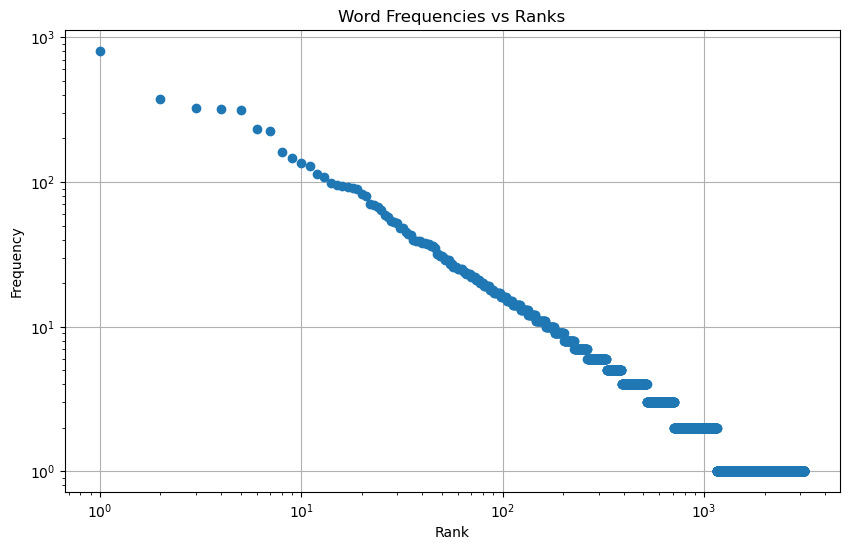

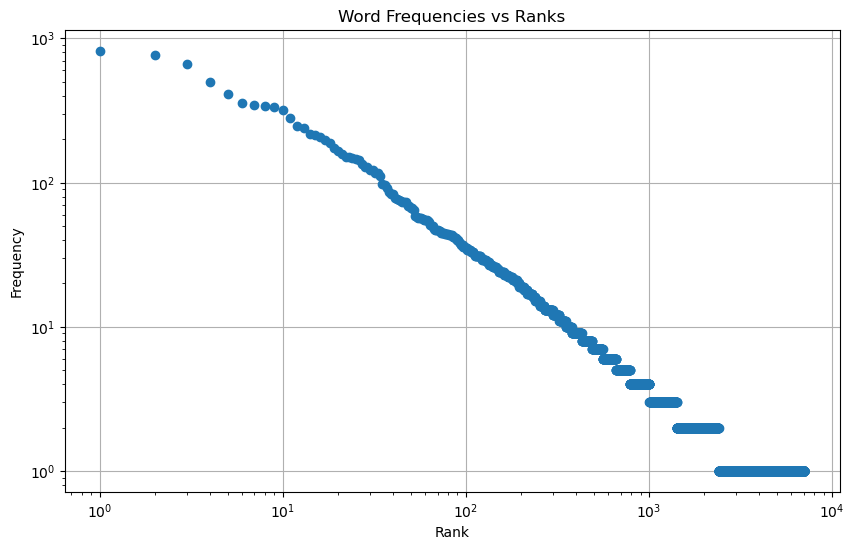

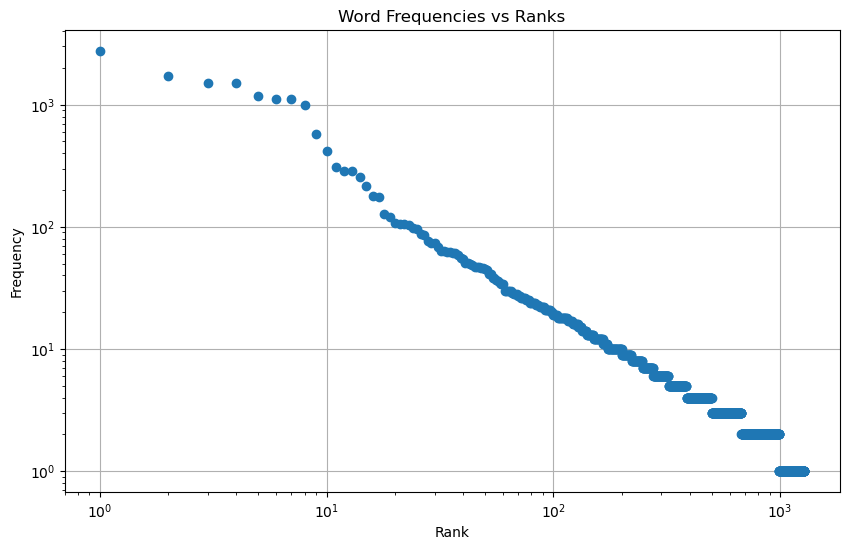

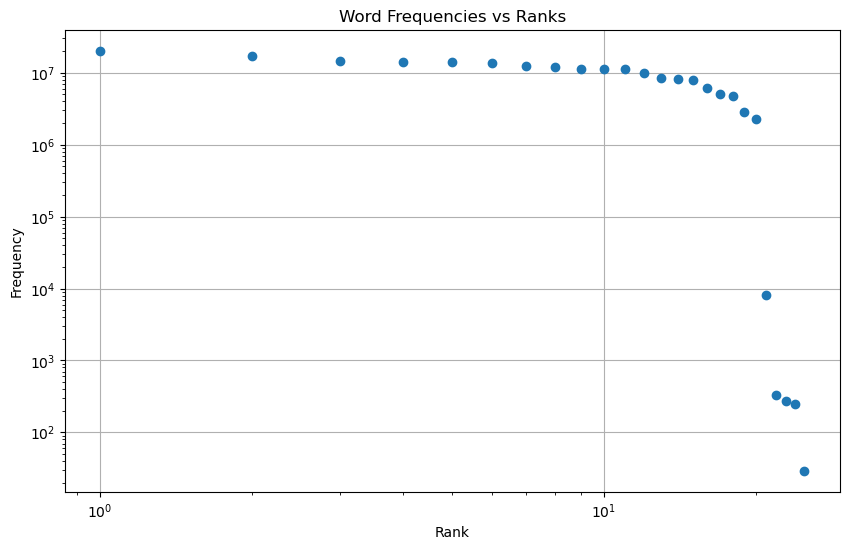

In [4]:
import tokenize

# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_loglog("English", f.read().lower().split())

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_loglog("German", f.read().lower().split())

# run on Transformer's trainer module's source code, log-log scale
with open("data/trainer.py", "r", encoding="utf-8") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    analysis_loglog("Python", tokens)
    
# run on Uniprot's protein data, log-log scale
with open("data/uniprot_sprot.fasta", "r", encoding="utf-8-sig") as f:
    proteins = []
    for line in f:
        if line.startswith(">"):
            continue
        proteins.append(line.strip())
    proteins_long = ''.join(proteins)
    analysis_loglog("Proteins", [*proteins_long])

### 2.2
The first plot uses a linear scale, but it doesn't show any noticeable difference in frequencies beyond rank 100. Therefore, it doesn't provide useful information about the differences in frequencies for higher ranks. However, for the first 100 ranks, the differences in frequencies are more clearly visible on a log-log scale than on a linear scale. The log-log scale is useful when dealing with data demonstrating Power-law Relationships. It allows you to identify trends, compare growth rates, and analyze frequency distributions more effectively.


### 2.3
Zipf's Law states that the frequency of a word decreases as its rank in the frequency distribution increases. In other words, the most common word occurs approximately twice as often as the second most common word, three times as often as the third most common word, and so on. This relationship leads to a rapid decrease in word frequencies as rank increases, which is reflected in the log-log plot.

The vertical gaps or "steps" in the log-log plot occur because of this rapid decrease in word frequencies with increasing rank, as predicted by Zipf's Law. As ranks move towards higher values, the frequency of words diminishes significantly, resulting in fewer data points and larger intervals between them. This creates distinct steps or gaps in the log-log plot, a characteristic feature observed in datasets that follow Zipf's Law.

### 2.4
The differences between languages can be observed in the distribution of word frequencies. According to the plots in 2.1, it can bee seen that the forth language differs most from the other three languages. Certain languages may have different word frequencies due to linguistic  factors such as vocabulary size and word usage  patterns.

In [10]:
#3.1
### 3.1
# your code for 2. and 3. goes here!
# TODO:

def analysis_loglog2(name, data):
    """
    Plot Zipfian distribution of words + ideal Zipfian distribution on a loglog scale.
    Compute and print out MSE.

    :param name: title of the graph
    :param data: list of words
    """
    word_freq = Counter(data)
    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1],reverse=True)

    ranks = range(1,len(sorted_freq)+1)
    freqs = [pair[1] for pair in sorted_freq]

    # Calculate ideal frequencies according to Zipf's Law
    ideal = [freqs[0] / rank for rank in ranks]

    # Plot the frequencies against ranks with log-log scale
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, freqs, marker='o', linestyle='', label='actual')
    plt.loglog(ranks, ideal, linestyle='--', color='red', label='ideal')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'Word Frequencies vs Ranks (Log-Log Scale) - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

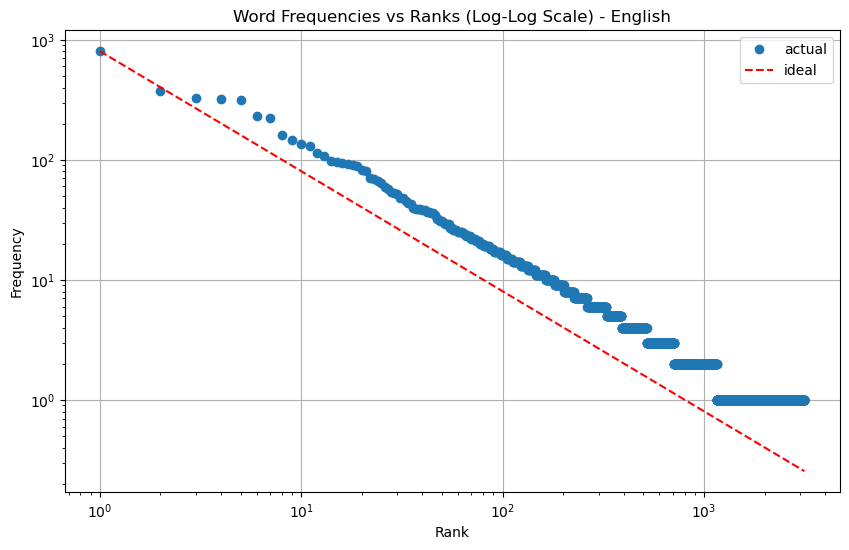

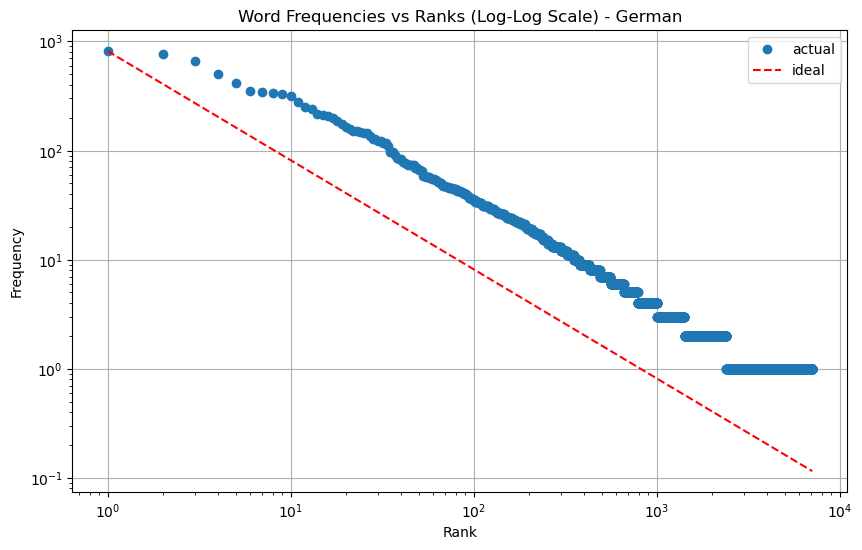

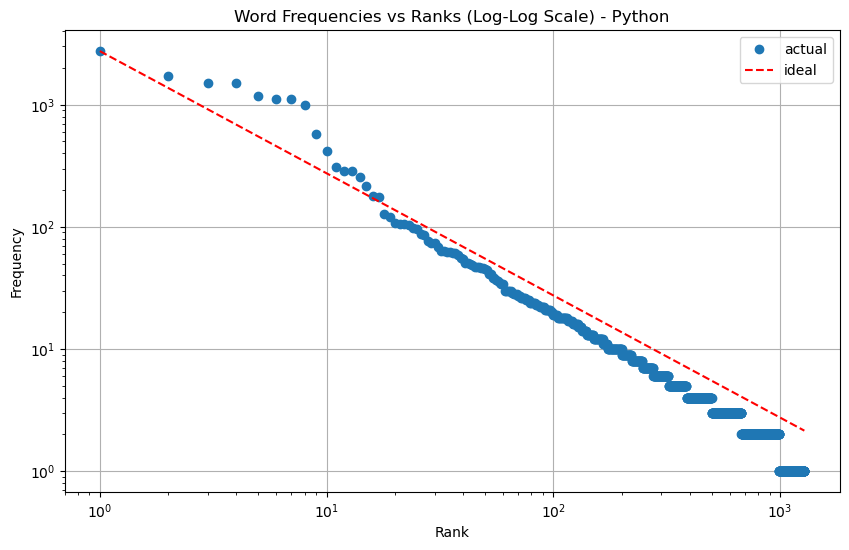

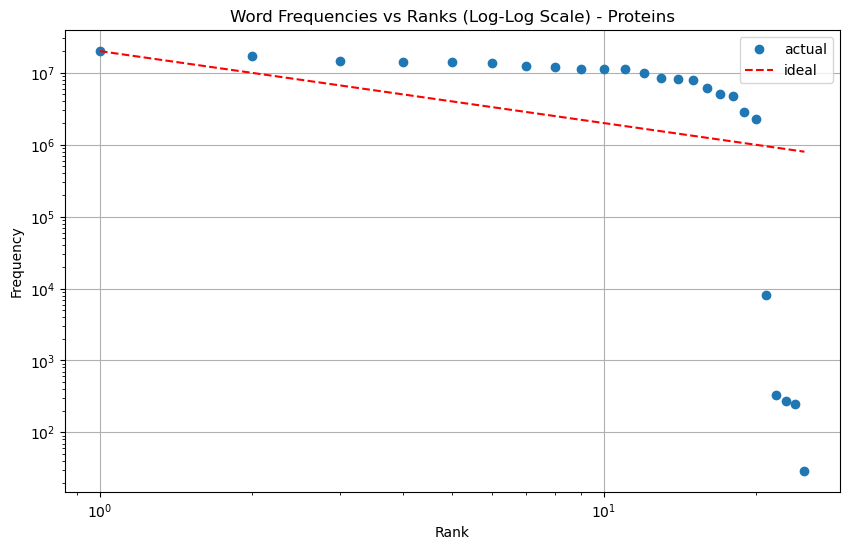

In [11]:
import tokenize

# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_loglog2("English", f.read().lower().split())

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_loglog2("German", f.read().lower().split())

# run on Transformer's trainer module's source code, log-log scale
with open("data/trainer.py", "r", encoding="utf-8") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    analysis_loglog2("Python", tokens)
    
# run on Uniprot's protein data, log-log scale
with open("data/uniprot_sprot.fasta", "r", encoding="utf-8-sig") as f:
    proteins = []
    for line in f:
        if line.startswith(">"):
            continue
        proteins.append(line.strip())
    proteins_long = ''.join(proteins)
    analysis_loglog2("Proteins", [*proteins_long])

In [18]:
### 3.2
# TODO:
import numpy as np
def analysis_MSE(name, data):
    """
    Plot Zipfian distribution of words + ideal Zipfian distribution on a loglog scale.
    Compute and print out MSE.

    :param name: title of the graph
    :param data: list of words
    """
    word_freq = Counter(data)
    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1],reverse=True)

    ranks = range(1,len(sorted_freq)+1)
    freqs = [pair[1] for pair in sorted_freq]

    # Calculate ideal frequencies according to Zipf's Law
    ideal = [freqs[0] / rank for rank in ranks]

    # Calculate mean squared error (MSE)
    mse = np.mean((np.array(ideal) - np.array(freqs)) ** 2)

    print("MSE value: ", mse)

In [19]:
import tokenize

# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_MSE("English", f.read().lower().split())

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_MSE("German", f.read().lower().split())

# run on Transformer's trainer module's source code, log-log scale
with open("data/trainer.py", "r", encoding="utf-8") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    analysis_MSE("Python", tokens)
    
# run on Uniprot's protein data, log-log scale
with open("data/uniprot_sprot.fasta", "r", encoding="utf-8-sig") as f:
    proteins = []
    for line in f:
        if line.startswith(">"):
            continue
        proteins.append(line.strip())
    proteins_long = ''.join(proteins)
    analysis_MSE("Proteins", [*proteins_long])

MSE value:  39.663435283537986
MSE value:  185.493755646556
MSE value:  2412.3522544319558
MSE value:  44090518932084.734


## Bonus (3 = 1+0.5+0.5+1 points)

For these exercises, please use your own loaders similar to the ones we provided.

##### Bonus 1:
- Add another 'ideal' curve to your 4 plots, but use the Mandelbrot formula instead (lecture slides chapter_2 page 19). You should play around with the parameters a little bit, but it's not necessary to achieve a perfect fit for every plot. (1 point)

In [24]:
# your code for Bonus 1 goes here!
# TODO:
def analysis_loglogM(name, data):
    """
    Plot Zipfian distribution of words + ideal Zipfian distribution on a loglog scale.
    Compute and print out MSE.

    :param name: title of the graph
    :param data: list of words
    """
    word_freq = Counter(data)
    sorted_freq = sorted(word_freq.items(), key=lambda x: x[1],reverse=True)

    ranks = range(1,len(sorted_freq)+1)
    freqs = [pair[1] for pair in sorted_freq]

    # Calculate ideal frequencies according to Zipf's Law
    ideal = [freqs[0] / rank for rank in ranks]


    # Calculate ideal frequencies according to Mandelbrot Distribution
    ideal2 = [(ranks[0] / (rank + 100)) ** (0.5) for rank in ranks]
    
    # Plot the frequencies against ranks with log-log scale
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, freqs, marker='o', linestyle='', label='actual')
    plt.loglog(ranks, ideal, linestyle='--', color='red', label='ideal')
    plt.loglog(ranks, ideal2, linestyle='--', color='green', label='ideal2')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'Word Frequencies vs Ranks (Log-Log Scale) - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

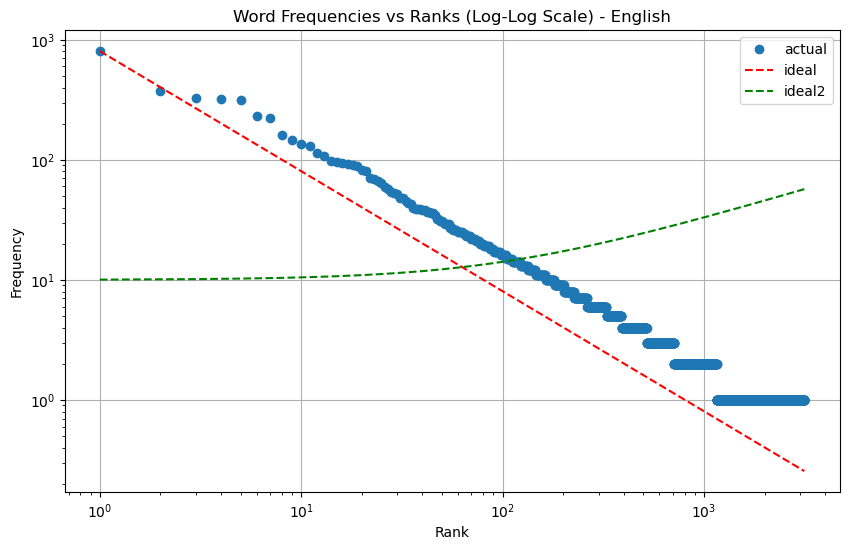

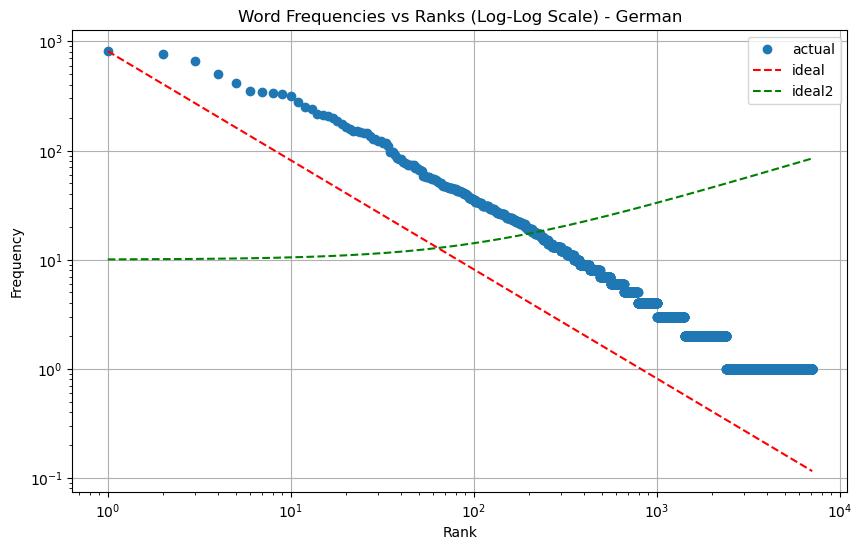

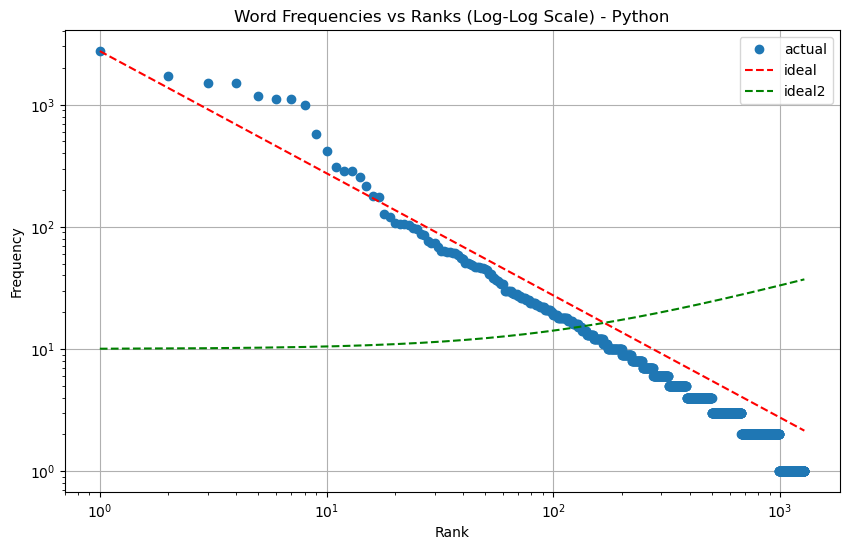

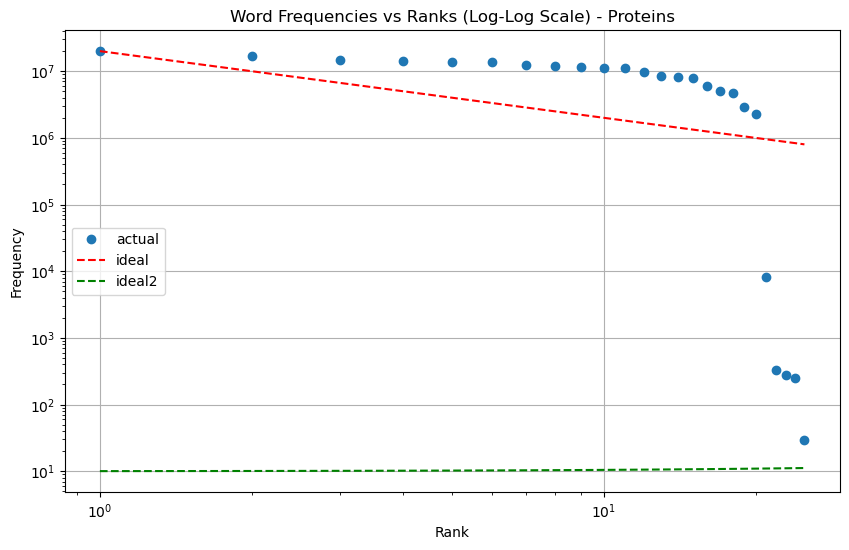

In [25]:
import tokenize

# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_loglogM("English", f.read().lower().split())

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_loglogM("German", f.read().lower().split())

# run on Transformer's trainer module's source code, log-log scale
with open("data/trainer.py", "r", encoding="utf-8") as f:
    tokens = [
        x.string
        for x in tokenize.generate_tokens(f.readline)
        if x.type not in {
            tokenize.COMMENT, tokenize.STRING, tokenize.INDENT, tokenize.DEDENT, tokenize.NEWLINE
        }
    ]
    analysis_loglogM("Python", tokens)
    
# run on Uniprot's protein data, log-log scale
with open("data/uniprot_sprot.fasta", "r", encoding="utf-8-sig") as f:
    proteins = []
    for line in f:
        if line.startswith(">"):
            continue
        proteins.append(line.strip())
    proteins_long = ''.join(proteins)
    analysis_loglogM("Proteins", [*proteins_long])

##### Bonus 2: run these two experiments for both of the `alice` texts (independent of each other) like you did in the main exercises:
- (Bonus 2.1) Don't lowercase anything. (0.5 points)
- (Bonus 2.2) Use character level tokenization, rather than word level. (0.5 points)

You don't have to include the Mandelbrot function here.

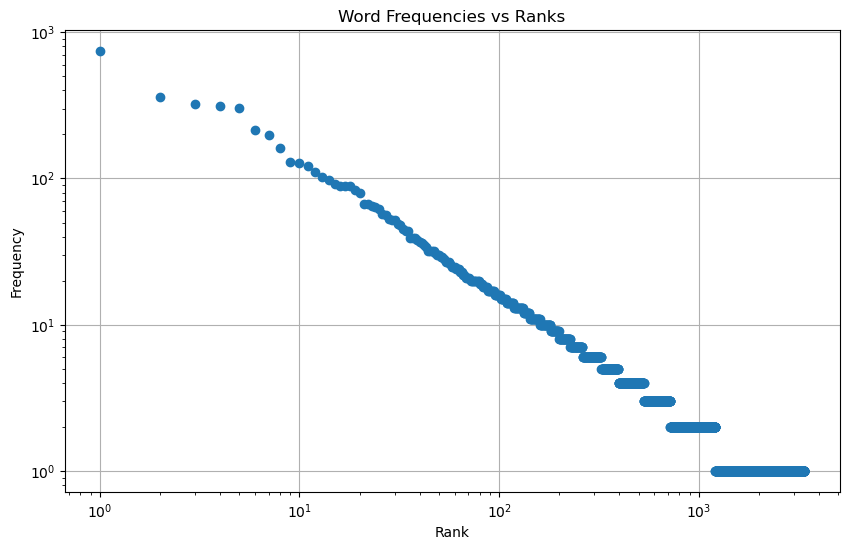

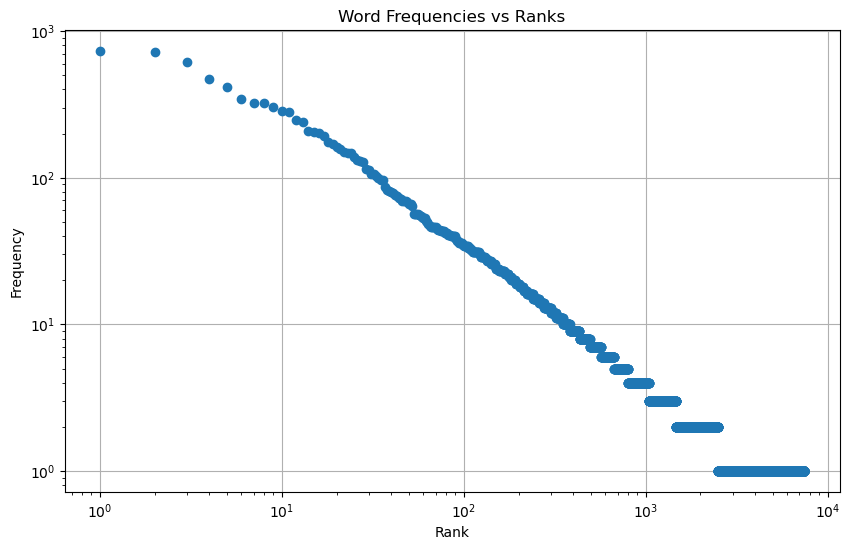

In [34]:
# Bonus 2.1
# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_loglog("English", f.read().split())

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_loglog("German", f.read().split())

In [35]:
# your code for Bonus 2.2 goes here!
# TODO:
def analysis_22(name, data):
    # Tokenize the text at character level
    characters = list(data)

    # Count character frequencies
    char_freqs = Counter(characters)

    # Sort characters by frequency
    sorted_char_freqs = sorted(char_freqs.items(), key=lambda x: x[1], reverse=True)

    # Extract ranks and frequencies
    ranks = range(1, len(sorted_char_freqs) + 1)
    freqs = [pair[1] for pair in sorted_char_freqs]

    # Plot the frequencies against ranks with log-log scale
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, freqs, marker='o', linestyle='')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.title(f'Character Frequencies vs Ranks (Log-Log Scale) - {name}')
    plt.grid(True)
    plt.show()

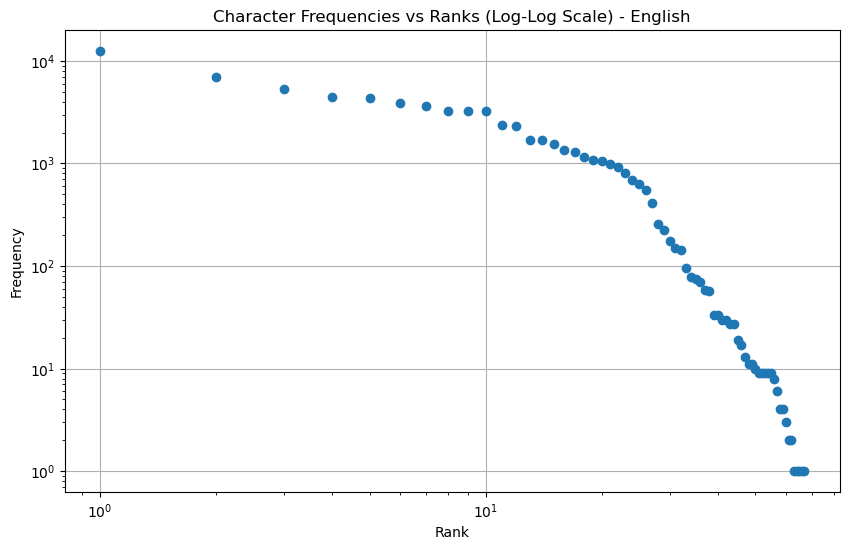

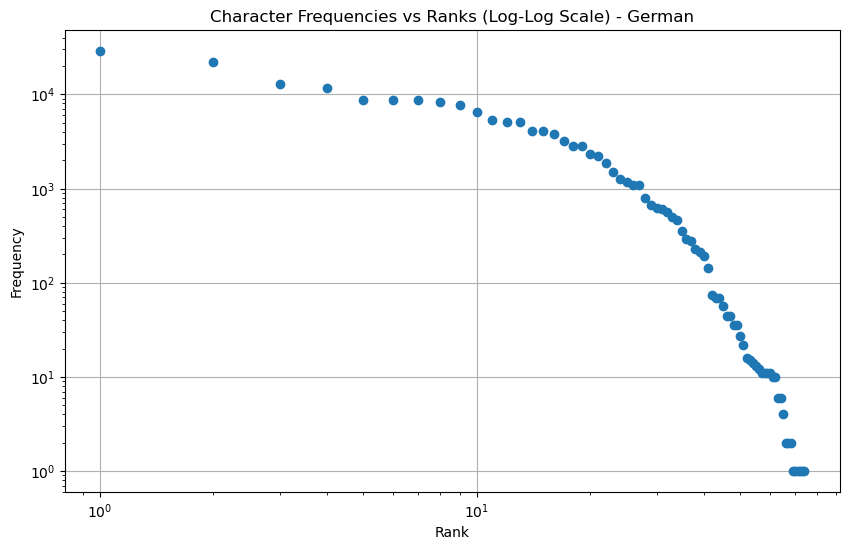

In [36]:
# run on English text, log-log scale
with open("data/alice_eng.txt", "r", encoding="utf-8") as f:
    analysis_22("English", f.read().lower())

# run on German text, log-log scale
with open("data/alice_ger.txt", "r", encoding="utf-8") as f:
    analysis_22("German", f.read().lower())

##### Bonus 3:
- Use NLTK's corpora and download the `Brown corpus` corpus (id: "brown") and create a plot like you did before. (1 point)

[nltk_data] Downloading package brown to
[nltk_data]     /Users/shahlajahangiri/nltk_data...
[nltk_data]   Package brown is already up-to-date!


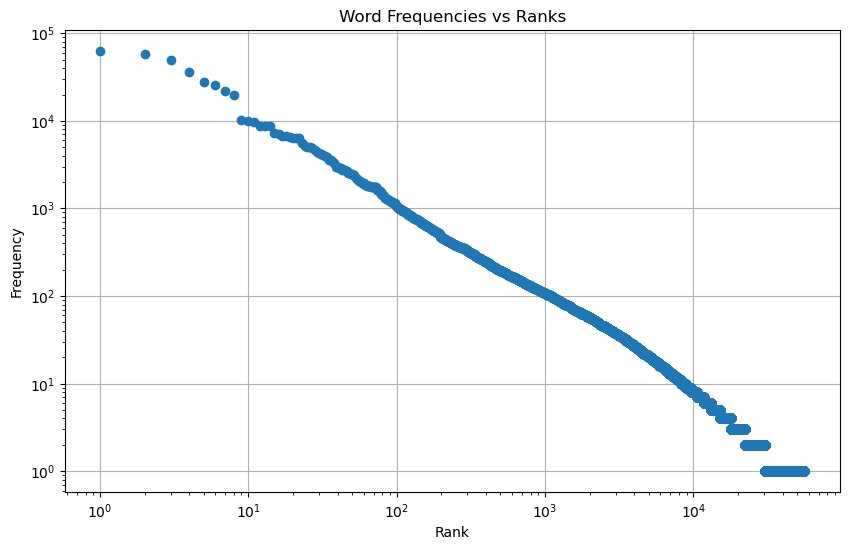

In [41]:
# your code for Bonus 3 goes here!
# TODO:
import nltk
from nltk.corpus import brown

nltk.download('brown')

brown_corpus = brown.words()

analysis_loglog("English", brown_corpus)